In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

### Problem statement -  Loan prediction

## Step 1 : Data Gathering

In [5]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [8]:
train_df

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,65288,LP002560,0,1,0,0,0,1297,3293.124489,17,373,1,1,1,3750
5894,86963,LP002585,1,1,0,0,0,7358,0.000000,17,365,1,2,1,3547
5895,69407,LP002175,1,1,2,0,0,150,0.000000,170,353,1,1,1,3750
5896,82002,LP002560,1,0,0,0,0,2230,0.000000,222,367,1,2,0,3750


In [10]:
test_df

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,15578,LP002175,1,1,0,0,0,7276,0.000000,168,367,1,1,3750
2524,87689,LP002582,1,1,0,0,1,8153,1585.948119,17,406,1,1,3750
2525,42584,LP002231,1,1,0,0,0,16382,600.813513,17,348,1,2,3750
2526,44709,LP002224,1,1,0,0,0,7791,0.000000,78,350,0,1,3750


##  Step 2:EDA - Read and explore the data

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 691.3+ KB


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2528 non-null   int64  
 1   Loan_ID            2528 non-null   object 
 2   Gender             2528 non-null   int64  
 3   Married            2528 non-null   int64  
 4   Dependents         2528 non-null   object 
 5   Education          2528 non-null   int64  
 6   Self_Employed      2528 non-null   int64  
 7   ApplicantIncome    2528 non-null   int64  
 8   CoapplicantIncome  2528 non-null   float64
 9   LoanAmount         2528 non-null   int64  
 10  Loan_Amount_Term   2528 non-null   int64  
 11  Credit_History     2528 non-null   int64  
 12  Property_Area      2528 non-null   int64  
 13  Total_Income       2528 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 276.6+ KB


In [17]:
train_df.describe()

,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,54964.183452,0.910817,0.854527,0.120210,0.107664,7782.026958,1245.954548,97.410478,359.114954,0.920482,1.183961,0.832994,5239.284503
std,26133.640949,0.285032,0.352607,0.325235,0.309981,9182.571831,2368.012349,103.483478,48.876088,0.270569,0.730568,0.373013,2308.679455
min,10002.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,1963.000000
25%,32337.000000,1.000000,1.000000,0.000000,0.000000,2342.250000,0.000000,17.000000,357.000000,1.000000,1.000000,1.000000,3750.000000
50%,55501.000000,1.000000,1.000000,0.000000,0.000000,6989.000000,117.562275,42.000000,368.000000,1.000000,1.000000,1.000000,6000.000000
75%,77775.750000,1.000000,1.000000,0.000000,0.000000,8375.000000,1680.894542,174.000000,372.000000,1.000000,2.000000,1.000000,6000.000000
max,99998.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,1.000000,22500.000000


In [19]:
test_df.describe()

,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
count,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000
mean,55348.986551,0.916139,0.833465,0.118671,0.103244,7712.301820,1262.994361,96.474684,359.701741,0.927611,1.214003,5188.653481
std,26098.461169,0.277234,0.372634,0.323465,0.304337,8653.011599,2288.564517,105.096113,48.404472,0.259183,0.714823,2236.524313
min,10001.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,3083.000000
25%,32297.250000,1.000000,1.000000,0.000000,0.000000,2426.250000,0.000000,17.000000,357.000000,1.000000,1.000000,3750.000000
50%,55979.000000,1.000000,1.000000,0.000000,0.000000,7051.500000,167.431656,36.000000,368.000000,1.000000,1.000000,5166.000000
75%,77562.250000,1.000000,1.000000,0.000000,0.000000,8380.250000,1855.758084,171.000000,372.000000,1.000000,2.000000,6000.000000
max,99931.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,18917.000000


In [20]:
train_df.isna().sum()*100/len(train_df)

ID                   0.0
Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
Total_Income         0.0
dtype: float64

In [23]:
test_df.isna().sum()*100/len(test_df)

ID                   0.0
Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Total_Income         0.0
dtype: float64

## Step 3: Missing value imputation

### 1.Gender

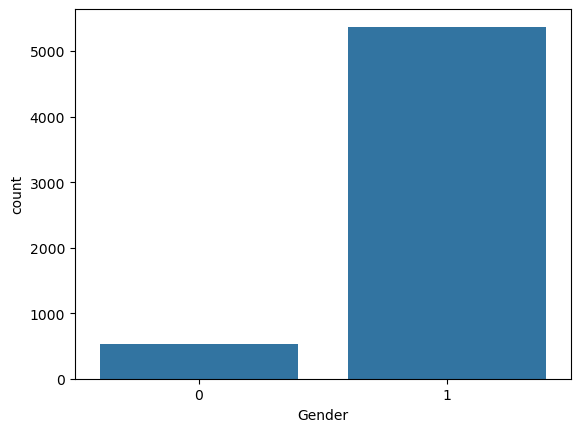

In [27]:
sns.countplot(x = train_df['Gender'])
plt.show()

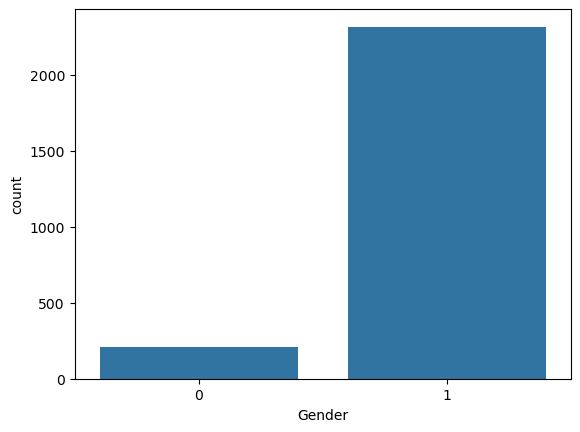

In [29]:
sns.countplot(x = test_df['Gender'])
plt.show()

In [31]:
train_df['Gender'].mode()[0]

1

In [33]:
train_df['Gender'] = train_df['Gender'].fillna(train_df['Gender'].mode()[0])

### 2.Married

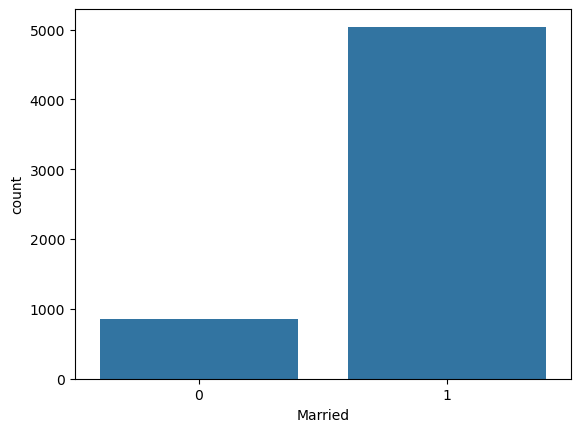

In [36]:
sns.countplot(x= train_df['Married'])
plt.show()

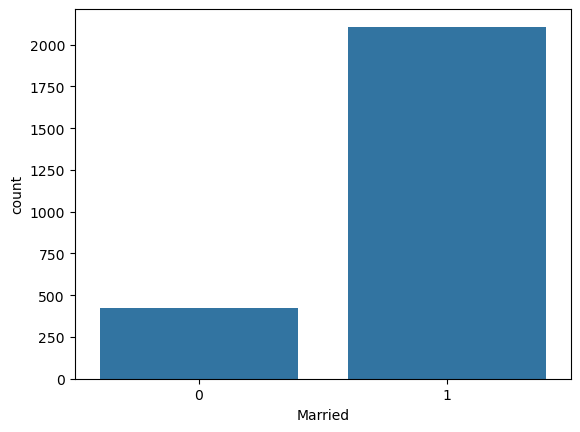

In [38]:
sns.countplot(x= test_df['Married'])
plt.show()

In [40]:
train_df['Married'].mode()[0]

1

In [42]:
train_df['Married'] = train_df['Married'].fillna(train_df['Married'].mode()[0])

### 3.Dependents

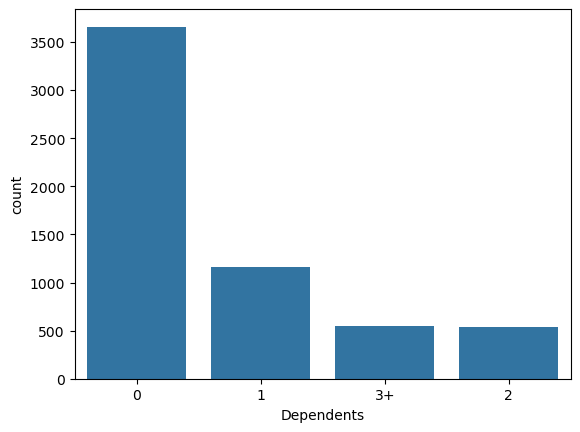

In [45]:
sns.countplot(x=train_df['Dependents'])
plt.show()

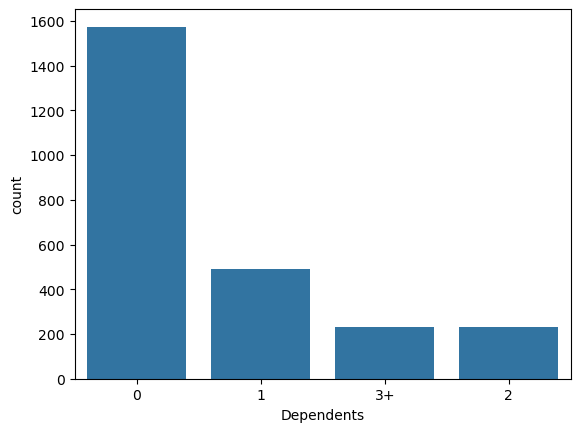

In [47]:
sns.countplot(x=test_df['Dependents'])
plt.show()

In [48]:
train_df['Dependents'].value_counts()

Dependents
0     3659
1     1157
3+     546
2      536
Name: count, dtype: int64

In [51]:
test_df['Dependents'].value_counts()

Dependents
0     1574
1      490
3+     233
2      231
Name: count, dtype: int64

In [53]:
train_df['Dependents'].mode()[0]

'0'

In [55]:
test_df['Dependents'].mode()[0]

'0'

In [57]:
train_df['Dependents'] = train_df['Dependents'].fillna(train_df['Dependents'].mode()[0])

In [59]:
test_df['Dependents'] = test_df['Dependents'].fillna(test_df['Dependents'].mode()[0])

### 4.Self_Employed 

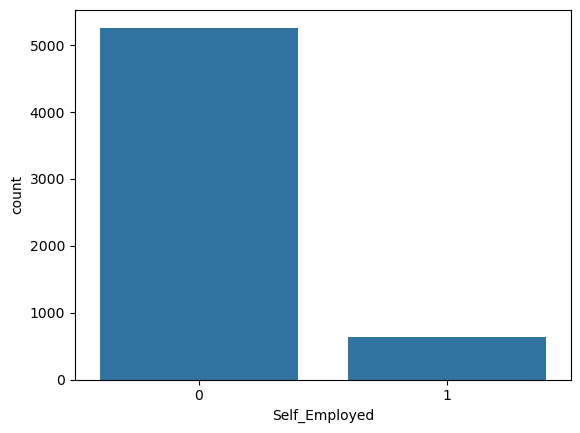

In [62]:
sns.countplot(x = train_df['Self_Employed'])
plt.show()

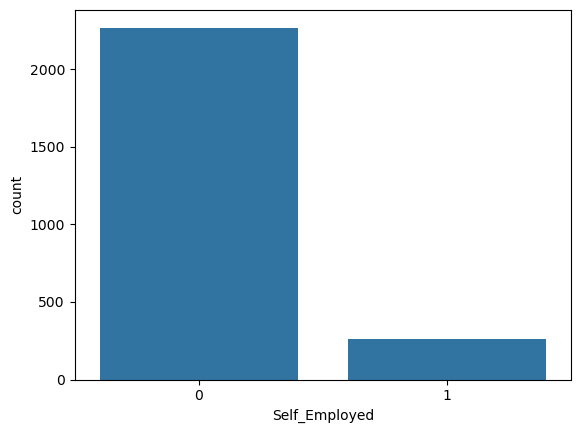

In [64]:
sns.countplot(x = test_df['Self_Employed'])
plt.show()

In [66]:
train_df['Self_Employed'].mode()[0]

0

In [68]:
train_df['Self_Employed'] = train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0])

In [70]:
train_df.isna().sum()*100/len(train_df)

ID                   0.0
Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
Total_Income         0.0
dtype: float64

In [72]:
test_df.isna().sum()*100/len(test_df)

ID                   0.0
Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Total_Income         0.0
dtype: float64

### 5.LoanAmount

In [75]:
train_df['LoanAmount'].median()

42.0

In [77]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())

### 6.Loan_Amount_Term

In [80]:
train_df['Loan_Amount_Term'].median()

368.0

In [82]:
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median())

### 7.Credit_History

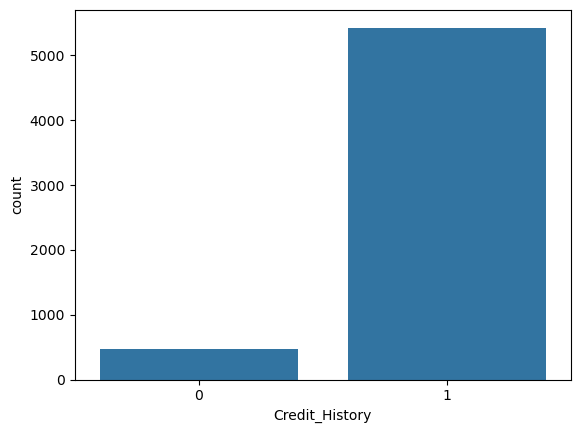

In [85]:
sns.countplot(x = train_df['Credit_History'])
plt.show()

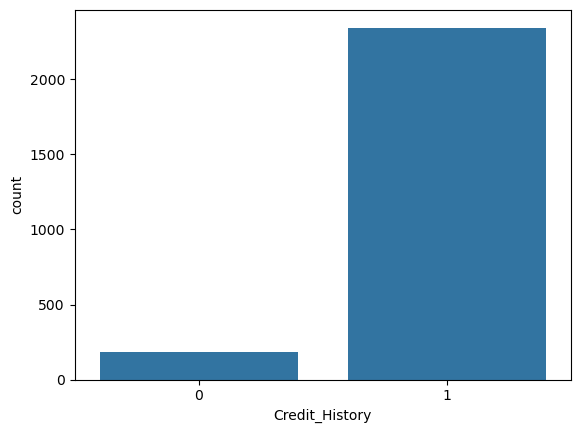

In [87]:
sns.countplot(x = test_df['Credit_History'])
plt.show()

In [89]:
train_df['Credit_History'].mode()[0]

1

In [91]:
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0])

In [93]:
train_df.isna().sum()

ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [95]:
test_df.isna().sum()

ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
dtype: int64

## Step 4 : Feature creation

In [98]:
train_df.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


In [100]:
test_df.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750


In [102]:
train_df.replace({
    "Loan_Status": {'N': 0, 'Y': 1},
    "Gender": {'Male': 0, 'Female': 1},
    "Education": {'Not Graduate': 0, 'Graduate': 1},
    "Married": {'No': 0, 'Yes': 1},
    "Self_Employed": {'No': 0, 'Yes': 1}
}, inplace=True)

In [104]:
train_df

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,65288,LP002560,0,1,0,0,0,1297,3293.124489,17,373,1,1,1,3750
5894,86963,LP002585,1,1,0,0,0,7358,0.000000,17,365,1,2,1,3547
5895,69407,LP002175,1,1,2,0,0,150,0.000000,170,353,1,1,1,3750
5896,82002,LP002560,1,0,0,0,0,2230,0.000000,222,367,1,2,0,3750


In [106]:
train_df['Total_Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
test_df['Total_Income'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

In [108]:
train_df.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,8328.000000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,4007.458782
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,5303.472511
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,150.000000
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,8059.000000


In [110]:
test_df.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,16761.075952
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,7478.718887
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,8441.900354
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,150.000000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,8362.000000


## Step 5 : Train Test split the data

In [114]:

y_train = train_df["Loan_Status"]
x_train = train_df.drop(['Loan_Status', "ID", "Education", "Gender", "Self_Employed", "Credit_History", 'Loan_ID', "Married", 'ApplicantIncome', 'CoapplicantIncome'], axis=1)
x_train = pd.get_dummies(data = x_train, columns = ["Property_Area","Dependents"])

print(y_train)
print(x_train)

x_test = test_df.drop(['Loan_ID', 'ID', "Education", "Gender", 'ApplicantIncome', "Self_Employed", "Credit_History", "Married", 'CoapplicantIncome'], axis=1)
x_test = pd.get_dummies(data=x_test, columns=["Property_Area", "Dependents"])

x_test = x_test.reindex(columns=x_train.columns, fill_value=0)
    
print(x_train.head(5))
print(x_test.head(5))
print(x_train.columns)
print(x_test.columns)
features = list(x_train.columns)
features = list(x_test.columns)


0       1
1       0
2       0
3       1
4       1
       ..
5893    1
5894    1
5895    1
5896    0
5897    1
Name: Loan_Status, Length: 5898, dtype: int64
      LoanAmount  Loan_Amount_Term  Total_Income  Property_Area_0  \
0             17               363   8328.000000            False   
1            188               370   4007.458782            False   
2             17               348   5303.472511             True   
3            232               359    150.000000            False   
4             17               372   8059.000000             True   
...          ...               ...           ...              ...   
5893          17               373   4590.124489            False   
5894          17               365   7358.000000            False   
5895         170               353    150.000000            False   
5896         222               367   2230.000000            False   
5897         105               347    150.000000             True   

      Property_

## Step 6: Fit and evaluate model

In [117]:
def fit_and_evaluate_model(x_train, x_test, y_train):
    random_forest = RandomForestClassifier(random_state=0,
                                           max_depth=5,
                                           min_samples_split=0.01,
                                           max_features=0.8,
                                           max_samples=0.8)
    
    random_forest.fit(x_train, y_train)
    
    return random_forest

In [119]:
model = fit_and_evaluate_model(x_train, x_test, y_train)

In [120]:
importances = pd.DataFrame(model[0].feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True, inplace=True)

# Step 7: Feature importance

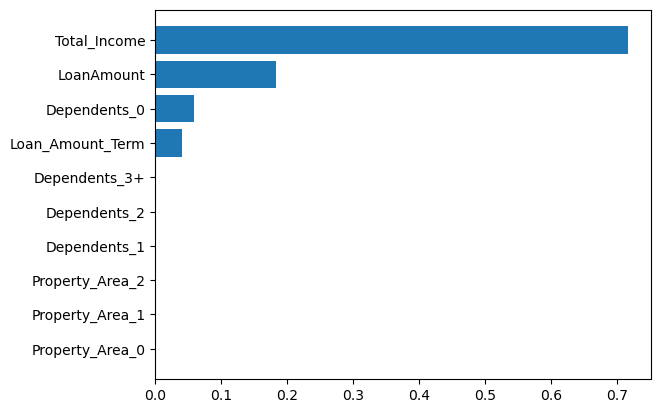

In [125]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)
plt.show()

In [128]:
# Predicted Probability for each class

In [130]:
rf_proba = model.predict_proba(x_test)
rf_predict = model.predict(x_test)
print(rf_proba[0:10])
print(rf_predict)

[[0.15648803 0.84351197]
 [0.1417992  0.8582008 ]
 [0.14788709 0.85211291]
 [0.155392   0.844608  ]
 [0.19462638 0.80537362]
 [0.15574828 0.84425172]
 [0.18473143 0.81526857]
 [0.19197539 0.80802461]
 [0.14358571 0.85641429]
 [0.18761958 0.81238042]]
[1 1 1 ... 1 1 1]


In [154]:
results_df = pd.DataFrame({
    'ID': test_df['ID'],
    'Loan_Status': rf_predict
})

results_df.to_csv('predict.csv', index=False)

print("Predictions saved to loan_predictions.csv")

Predictions saved to loan_predictions.csv
